## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [7]:
y = df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transforms
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),   # L1 Regularization
    "Ridge": Ridge(),   # L2 Regularization
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('* Model performance for Training set')
    print("\t- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("\t- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("\t- R2 Score: {:.4f}".format(model_train_r2))
    
    print('\n* Model performance for Test set')
    print("\t- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("\t- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("\t- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
* Model performance for Training set
	- Root Mean Squared Error: 5.3257
	- Mean Absolute Error: 4.2695
	- R2 Score: 0.8742

* Model performance for Test set
	- Root Mean Squared Error: 5.4212
	- Mean Absolute Error: 4.2347
	- R2 Score: 0.8792


Lasso
* Model performance for Training set
	- Root Mean Squared Error: 6.5938
	- Mean Absolute Error: 5.2063
	- R2 Score: 0.8071

* Model performance for Test set
	- Root Mean Squared Error: 6.5197
	- Mean Absolute Error: 5.1579
	- R2 Score: 0.8253


Ridge
* Model performance for Training set
	- Root Mean Squared Error: 5.3233
	- Mean Absolute Error: 4.2650
	- R2 Score: 0.8743

* Model performance for Test set
	- Root Mean Squared Error: 5.3904
	- Mean Absolute Error: 4.2111
	- R2 Score: 0.8806




K-Neighbors Regressor
* Model performance for Training set
	- Root Mean Squared Error: 5.7079
	- Mean Absolute Error: 4.5168
	- R2 Score: 0.8555

* Model performance for Test set
	- Root Mean Squared Error: 7.2530
	- Mean Absolute Error: 5.6210
	- R2 Score: 0.7838


Decision Tree
* Model performance for Training set
	- Root Mean Squared Error: 0.2795
	- Mean Absolute Error: 0.0187
	- R2 Score: 0.9997

* Model performance for Test set
	- Root Mean Squared Error: 7.8368
	- Mean Absolute Error: 6.2850
	- R2 Score: 0.7476


Random Forest Regressor
* Model performance for Training set
	- Root Mean Squared Error: 2.2990
	- Mean Absolute Error: 1.8234
	- R2 Score: 0.9766

* Model performance for Test set
	- Root Mean Squared Error: 6.0155
	- Mean Absolute Error: 4.6481
	- R2 Score: 0.8513


XGBRegressor
* Model performance for Training set
	- Root Mean Squared Error: 1.0073
	- Mean Absolute Error: 0.6875
	- R2 Score: 0.9955

* Model performance for Test set
	- Root Mean Squared Error: 6.4733


### Results

In [15]:
# zip function creates list of tuples, where each tuple where each tuple contains model name and it's corresponding R2_Score.
pd.DataFrame(zip(model_list, r2_list),
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879226
8,AdaBoost Regressor,0.854727
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851292
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.747615


##### About R2_Score:
- 0: No explanatory power (model explains nothing).
- 0.5: Moderate explanatory power.
- 1: Perfect fit (model explains all the variance).

- Higher is better, but reaching 1 doesn't always guarantee a good model (overfitting).

## For Simplicity, Choosing **Linear Regression**

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.92


## Plot y_pred and y_test

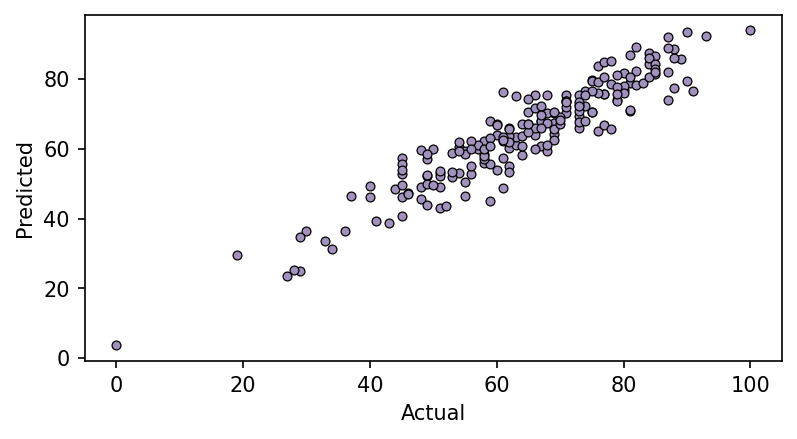

In [17]:
plt.figure(figsize=(6,3), dpi=150)
plt.scatter(y_test, y_pred, marker='o', s=18, c="#A091BD", edgecolors="black", lw=0.6);
plt.xlabel('Actual');
plt.ylabel('Predicted');

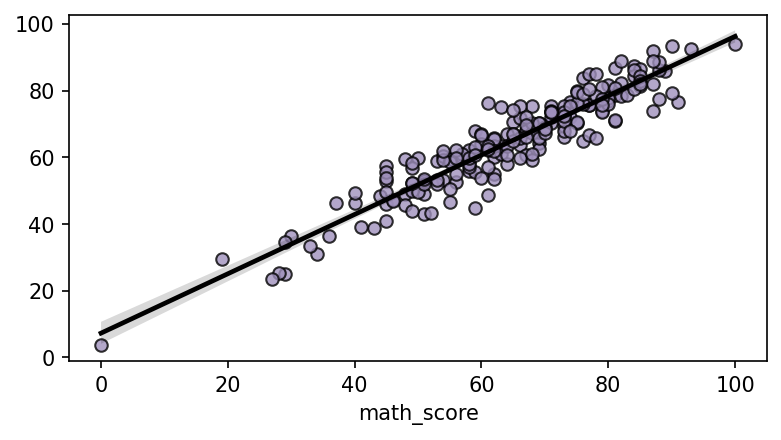

In [18]:
plt.figure(figsize=(6,3), dpi=150)
sns.regplot(x=y_test,
            y=y_pred,
            color ='black',
            scatter_kws={'color': '#A091BD', 'edgecolor': 'black'});

#### Difference between Actual and Predicted Values

In [19]:
pred_df = pd.DataFrame({'Actual Value' : y_test,
                        'Predicted Value' : y_pred,
                        'Difference':y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
